In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# data_sample = data.sample(frac=0.05, replace=False, random_state=1)
# data_sample.to_csv("modified_adult_train_sample.csv",index = None)

In [88]:
data = pd.read_csv("adult_train.csv")

its = pd.read_csv("generated/strong/ITS/sample_data_1_699_0.csv")
fds = pd.read_csv("generated/strong/fd/sample_data_1_690_0.csv")
mean_loss = pd.read_csv("generated/strong/mean/sample_data_1_699_0.csv")
origin_loss = pd.read_csv("generated/strong/origin/sample_data_1_699_0.csv")

its_weak = pd.read_csv("results/its_sample.csv")

its_complex = pd.read_csv("generated/complex/ITS/sample_data_1_699_0.csv")
mean_complex = pd.read_csv("generated/complex/mean/sample_data_1_699_0.csv")




In [84]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30143,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
30144,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
30145,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
30146,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [59]:
def plot_pdf(data,label,bin=10):
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)

    plt.plot(bins_count[1:], pdf, label=label)

def plot_cdf(data,label,bin=10):
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label=label)

def make_compare_plot(datasets,col_name, function, names, title):
    for i in range(len(datasets)):
        data = datasets[i]
        function(data[col_name],names[i])
    plt.title(title)
    plt.legend()
    plt.show()

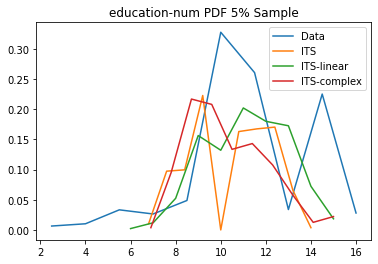

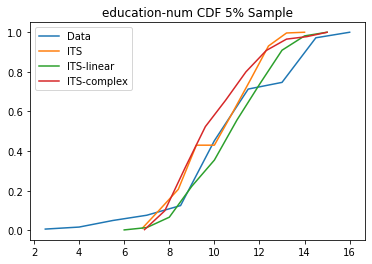

In [91]:
make_compare_plot([data,its,its_weak,its_complex],"education-num",plot_pdf,["Data","ITS","ITS-linear","ITS-complex"],"education-num PDF 5% Sample")
make_compare_plot([data,its,its_weak,its_complex],"education-num",plot_cdf,["Data","ITS","ITS-linear","ITS-complex"],"education-num CDF 5% Sample")

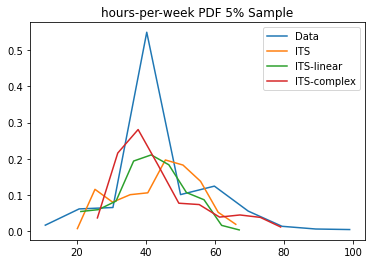

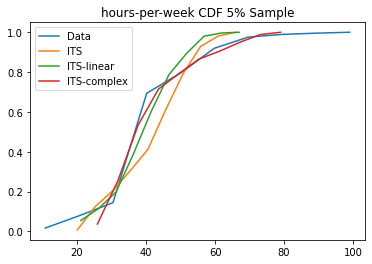

In [118]:
make_compare_plot([data,its,its_weak,its_complex],"hours-per-week",plot_pdf,["Data","ITS","ITS-linear","ITS-complex"],"hours-per-week PDF 5% Sample")
make_compare_plot([data,its,its_weak,its_complex],"hours-per-week",plot_cdf,["Data","ITS","ITS-linear","ITS-complex"],"hours-per-week CDF 5% Sample")

In [ ]:
data.dtypes

## Machine Learning Performance

In [ ]:
data

In [62]:
def convert_type(data,columns):
    data = data[columns].astype('category')
    for col in columns:
        data[col] = data[col].cat.codes
    return data

In [93]:
data["label"] = "data"
its["label"] = "its"
fds["label"] = "fds"
mean_loss["label"] = "mean_loss"
its_weak["label"] = "its_linear"
its_complex["label"] = "its_complex"
mean_complex["label"] = "mean_complex"



full = pd.concat([data,its,fds,mean_loss,its_weak,its_complex,mean_complex])

In [94]:
full[['workclass','education', 
       'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country','income']] = convert_type(full,['workclass','education', 
       'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country','income'])

In [97]:
data = full[full["label"] == "data"]
its = full[full["label"] == "its"]
fds = full[full["label"] == "fds"]
mean_loss = full[full["label"] == "mean_loss"]
its_weak = full[full["label"] == "its_linear"]
its_complex = full[full["label"] == "its_complex"]
mean_complex = full[full["label"] == "mean_complex"]


In [98]:
import numpy
from sklearn.model_selection import cross_val_score
# x is your dataset
origin_np = np.array(data)
col = list(data.columns)
indices = numpy.random.permutation(data.shape[0])
n = data.shape[0] - fds.shape[0]
test_idx, training_idx = indices[:n], indices[n:]
training_data, test = pd.DataFrame(origin_np[training_idx,:],columns = col), pd.DataFrame(origin_np[test_idx,:],columns = col)


### Predict marital-status (FD)

In [99]:
train_data_y = training_data["marital-status"].astype("float64")
train_data_X = training_data.drop(columns=["marital-status","label","fnlwgt"]).astype("float64")
#train_data_y = training_data["income"]

test_data_X = test.drop(columns=["marital-status","label","fnlwgt"]).astype("float64")
test_data_y = test["marital-status"].astype("float64")


# ITS-Linear
train_its_weak_X = its_weak.drop(columns=["marital-status","label","fnlwgt"]).astype("float64")
train_its_weak_y = its_weak["marital-status"].astype("float64")

# origin ITS Loss
train_its_X = its.drop(columns=["marital-status","label","fnlwgt"]).astype("float64")
train_its_y = its["marital-status"].astype("float64")


# origin FDS Loss
train_fds_X = fds.drop(columns=["marital-status","label","fnlwgt"]).astype("float64")
train_fds_y = fds["marital-status"].astype("float64")


# origin Means Loss
train_means_X = mean_loss.drop(columns=["marital-status","label","fnlwgt"]).astype("float64")
train_means_y = mean_loss["marital-status"].astype("float64")


# ITS-complex
train_its_complex_X = its_complex.drop(columns=["marital-status","label","fnlwgt"]).astype("float64")
train_its_complex_y = its_complex["marital-status"].astype("float64")

# mean-complex
train_mean_complex_X = mean_complex.drop(columns=["marital-status","label","fnlwgt"]).astype("float64")
train_mean_complex_y = mean_complex["marital-status"].astype("float64")

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

print("Predict marital-status(FD) using Decision Tree Classifier\n")

clf = DecisionTreeClassifier(max_depth = 5, random_state=1)

clf.fit(train_data_X, train_data_y)

print("Origin Data Score:",cross_val_score(clf, test_data_X,test_data_y, cv=3).mean())


print("+++")

clf.fit(train_its_weak_X, train_its_weak_y)
print("Linear FD Score:",clf.score(test_data_X,test_data_y))


print("+++ Linear FD +++")

clf.fit(train_its_weak_X, train_its_weak_y)
print("Linear FD Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ marital-status FD +++")
clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))
clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ Complex (Income) FD +++")
clf.fit(train_its_complex_X, train_its_complex_y)
print("ITS-Complex FD Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_mean_complex_X, train_mean_complex_y)
print("mean-Complex FD Score:",clf.score(test_data_X,test_data_y),"\n")
# 和普通mean loss 无区别 

# 说明 如果用relationship -> Marital-Status 做确实会让 预测 Marital-status的结果提升

Predict marital-status(FD) using Decision Tree Classifier

Origin Data Score: 0.8302650217678101
+++
Linear FD Score: 0.5410183384273409
+++ Linear FD +++
Linear FD Score: 0.5410183384273409 

+++ marital-status FD +++
ITS-GAN Score: 0.7377743817727146
FDs Loss Score: 0.6280216726868575
Mean Loss Score: 0.448388441233676 

+++ Complex (Income) FD +++
ITS-Complex FD Score: 0.6159002500694637
mean-Complex FD Score: 0.448388441233676 



In [108]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 3,random_state=1)

print("Predict marital-status(FD) using Random Forest Classifier\n")

clf.fit(train_data_X, train_data_y)
print("Origin Data Score:",clf.score(test_data_X,test_data_y))

print("+++ Linear FD +++")

clf.fit(train_its_weak_X, train_its_weak_y)
print("Linear FD Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ marital-status FD +++")
clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))
clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ Complex (Income) FD +++")
clf.fit(train_its_complex_X, train_its_complex_y)
print("ITS-Complex FD Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_mean_complex_X, train_mean_complex_y)
print("mean-Complex FD Score:",clf.score(test_data_X,test_data_y),"\n")


Predict marital-status(FD) using Random Forest Classifier

Origin Data Score: 0.7754584606835232
+++ Linear FD +++
Linear FD Score: 0.6503889969435954 

+++ marital-status FD +++
ITS-GAN Score: 0.7530911364267853
FDs Loss Score: 0.6507710475131981
Mean Loss Score: 0.7372186718532926 

+++ Complex (Income) FD +++
ITS-Complex FD Score: 0.7223186996387886
mean-Complex FD Score: 0.7372186718532926 



### Predict Income (FD)

In [114]:
train_data_y = training_data["income"].astype("float64")
train_data_X = training_data.drop(columns=["income","label","fnlwgt"]).astype("float64")
#train_data_y = training_data["income"]

test_data_X = test.drop(columns=["income","label","fnlwgt"]).astype("float64")
test_data_y = test["income"].astype("float64")


# ITS-Linear
train_its_weak_X = its_weak.drop(columns=["income","label","fnlwgt"]).astype("float64")
train_its_weak_y = its_weak["income"].astype("float64")

# origin ITS Loss
train_its_X = its.drop(columns=["income","label","fnlwgt"]).astype("float64")
train_its_y = its["income"].astype("float64")


# origin FDS Loss
train_fds_X = fds.drop(columns=["income","label","fnlwgt"]).astype("float64")
train_fds_y = fds["income"].astype("float64")


# origin Means Loss
train_means_X = mean_loss.drop(columns=["income","label","fnlwgt"]).astype("float64")
train_means_y = mean_loss["income"].astype("float64")


# ITS-complex
train_its_complex_X = its_complex.drop(columns=["income","label","fnlwgt"]).astype("float64")
train_its_complex_y = its_complex["income"].astype("float64")

# mean-complex
train_mean_complex_X = mean_complex.drop(columns=["income","label","fnlwgt"]).astype("float64")
train_mean_complex_y = mean_complex["income"].astype("float64")

In [116]:
print("Predict Income(FD) using Decision Tree Classifier\n")

clf = DecisionTreeClassifier(max_depth = 5, random_state=1)

clf.fit(train_data_X, train_data_y)

print("Origin Data Score:",cross_val_score(clf, test_data_X,test_data_y, cv=3).mean())


print("+++ Linear FD +++")

clf.fit(train_its_weak_X, train_its_weak_y)
print("Linear FD Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ marital-status FD +++")
clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))
clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ Complex (Income) FD +++")
clf.fit(train_its_complex_X, train_its_complex_y)
print("ITS-Complex FD Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_mean_complex_X, train_mean_complex_y)
print("mean-Complex FD Score:",clf.score(test_data_X,test_data_y),"\n")

Predict Income(FD) using Decision Tree Classifier

Origin Data Score: 0.8491594425450538
+++ Linear FD +++
Linear FD Score: 0.726799110864129 

+++ marital-status FD +++
ITS-GAN Score: 0.7596554598499583
FDs Loss Score: 0.7753542650736316
Mean Loss Score: 0.768338427340928 

+++ Complex (Income) FD +++
ITS-Complex FD Score: 0.6722006112809114
mean-Complex FD Score: 0.768338427340928 



In [117]:
clf = RandomForestClassifier(max_depth = 3,random_state=1)

print("Predict marital-status(FD) using Random Forest Classifier\n")

clf.fit(train_data_X, train_data_y)
print("Origin Data Score:",clf.score(test_data_X,test_data_y))

print("+++ Linear FD +++")

clf.fit(train_its_weak_X, train_its_weak_y)
print("Linear FD Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ marital-status FD +++")
clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))
clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ Complex (Income) FD +++")
clf.fit(train_its_complex_X, train_its_complex_y)
print("ITS-Complex FD Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_mean_complex_X, train_mean_complex_y)
print("mean-Complex FD Score:",clf.score(test_data_X,test_data_y),"\n")

Predict marital-status(FD) using Random Forest Classifier

Origin Data Score: 0.8125868296749097
+++ Linear FD +++
Linear FD Score: 0.7663239788830231 

+++ marital-status FD +++
ITS-GAN Score: 0.7887607668796888
FDs Loss Score: 0.7814323423173104
Mean Loss Score: 0.796158655181995 

+++ Complex (Income) FD +++
ITS-Complex FD Score: 0.7741386496248958
mean-Complex FD Score: 0.796158655181995 



### Predict Workclass (无FD)

In [109]:
train_data_y = training_data["workclass"].astype("float64")
train_data_X = training_data.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
#train_data_y = training_data["income"]

test_data_X = test.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
test_data_y = test["workclass"].astype("float64")


# origin GAN Loss
train_its_weak_X = its_weak.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_its_weak_y = its_weak["workclass"].astype("float64")

# origin ITS Loss
train_its_X = its.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_its_y = its["workclass"].astype("float64")


# origin FDS Loss
train_fds_X = fds.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_fds_y = fds["workclass"].astype("float64")


# origin Means Loss
train_means_X = mean_loss.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_means_y = mean_loss["workclass"].astype("float64")


# ITS-complex
train_its_complex_X = its_complex.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_its_complex_y = its_complex['workclass'].astype("float64")

# mean-complex
train_mean_complex_X = mean_complex.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_mean_complex_y = mean_complex['workclass'].astype("float64")


In [112]:
clf = DecisionTreeClassifier(max_depth = 5, random_state=1)

print("Predict workclass(6 classes) using Decision Tree Classifier\n")

clf.fit(train_data_X, train_data_y)

print("Origin Data Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ Linear FD +++")

clf.fit(train_its_weak_X, train_its_weak_y)
print("Linear FD Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ marital-status FD +++")
clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))
clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ Complex (Income) FD +++")
clf.fit(train_its_complex_X, train_its_complex_y)
print("ITS-Complex FD Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_mean_complex_X, train_mean_complex_y)
print("mean-Complex FD Score:",clf.score(test_data_X,test_data_y),"\n")





Predict workclass(6 classes) using Decision Tree Classifier

Origin Data Score: 0.7266601833842734 

+++ Linear FD +++
Linear FD Score: 0.6211794943039733 

+++ marital-status FD +++
ITS-GAN Score: 0.5713739927757711
FDs Loss Score: 0.6264587385384829
Mean Loss Score: 0.618678799666574 

+++ Complex (Income) FD +++
ITS-Complex FD Score: 0.5761322589608224
mean-Complex FD Score: 0.618678799666574 



In [113]:
clf = RandomForestClassifier(max_depth = 5,random_state=0)
print("Predict workclass(6 classes) using Random Forest Classifier\n")


clf.fit(train_data_X, train_data_y)

print("Origin Data Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ Linear FD +++")

clf.fit(train_its_weak_X, train_its_weak_y)
print("Linear FD Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ marital-status FD +++")
clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))
clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y),"\n")

print("+++ Complex (Income) FD +++")
clf.fit(train_its_complex_X, train_its_complex_y)
print("ITS-Complex FD Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_mean_complex_X, train_mean_complex_y)
print("mean-Complex FD Score:",clf.score(test_data_X,test_data_y),"\n")

# 对于非 FD 的 field来说 两个FD好像区别不太大？



Predict workclass(6 classes) using Random Forest Classifier

Origin Data Score: 0.7374270630730758 

+++ Linear FD +++
Linear FD Score: 0.6704292859127535 

+++ marital-status FD +++
ITS-GAN Score: 0.729647124201167
FDs Loss Score: 0.6931439288691303
Mean Loss Score: 0.7105793275909975 

+++ Complex (Income) FD +++
ITS-Complex FD Score: 0.6982842456237844
mean-Complex FD Score: 0.7105793275909975 

